/=============================================\
| X-PSI: X-ray Pulse Simulation and Inference |
|---------------------------------------------|
|                Version: 2.0.0               |
|---------------------------------------------|
|      https://xpsi-group.github.io/xpsi      |
\=============================================/

Imported GetDist version: 1.4
Imported nestcheck version: 0.2.1
Rank reporting: 0
scenario is not in environment variables, using passed argument.
scenario: literature
machine variable is not in environment variables, using passed argument.
machine: local
run_type is not in environment variables, using passed argument.
run_type: test
cannot import analysis name, using test_analysis
analysis_name: test_analysis
num_energies from environment variables failed, proceeding with default.
num_energies: 40
num_leaves from environment variables failed, proceeding with default.
num_leaves: 30
sqrt_num_cells from environment variables failed, proceeding with default

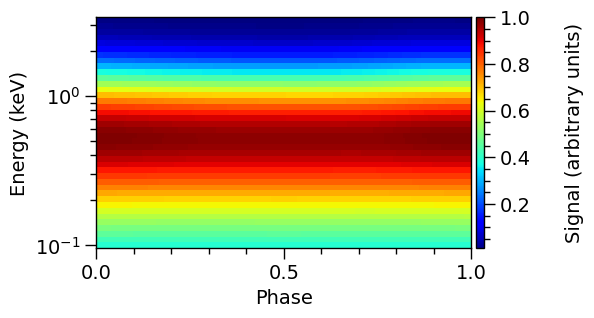

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 11 10:48:58 2023

@author: bas, much copied from postprocessing tutorial
"""

# Importing relevant modules

# %matplotlib inline

# from __future__ import division

import sys
import os
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.ticker import MultipleLocator, AutoLocator, AutoMinorLocator
from matplotlib import gridspec
from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import math

from collections import OrderedDict

import xpsi

from xpsi import PostProcessing

# choose a seed for the notebook if you want caching to be useful
# and the notebook exactly reproducible
PostProcessing.set_random_seed(42)

from xpsi.global_imports import gravradius


sys.path.append("../")
sys.path.append("../../")

from helper_functions import get_keV_from_log10_Kelvin


scenario = 'literature'
bkg = 'model'
support_factor = '5e-1'

from analysis import analysis
ST = analysis('local','test',bkg, support_factor=support_factor, scenario=scenario)
ST()

from parameter_values import parameter_values
pv = parameter_values(scenario, bkg)
truths = pv.truths()
names = pv.names()
bounds = pv.bounds()
labels = pv.labels()

getdist_kde_settings = {'ignore_rows': 0,
                        'min_weight_ratio': 1.0e-10,
                        'contours': [0.683, 0.954, 0.997],
                        'credible_interval_threshold': 0.001,
                        'range_ND_contour': 0,
                        'range_confidence': 0.001,
                        'fine_bins': 1024,
                        'smooth_scale_1D': 0.4,
                        'num_bins': 100,
                        'boundary_correction_order': 1,
                        'mult_bias_correction_order': 1,
                        'smooth_scale_2D': 0.4,
                        'max_corr_2D': 0.99,
                        'fine_bins_2D': 512,
                        'num_bins_2D': 40}





In [2]:
base_dir='/home/bas/Documents/Projects/x-psi/xpsi-bas-fork/AMXPs/J1808_synthetic/snellius_runs'

In [3]:
roots = []
job_ids = []
job_labels = []
run_ids = []

# negative background allowed, no support
# job_ids.append('5204648')
# job_labels.append('neg_bkg_lp192')

# fixed background
# job_ids.append('5133792')
# job_labels.append('given_bg_lp192')
# run_ids.append('fix bkg')

# no support
# job_ids.append('4960988')
# job_labels.append('no_poisson_lp192')

# sf = 1.5, seed = 7
# job_ids.append('5210494')
# job_labels.append('sf_15_lp192')
# run_ids.append('+- 50%')

# sf = 1.1, seed = 7
# job_ids.append('4977822')
# job_labels.append('np_sfac_1.1_lp192')

# job_ids.append('5216186')
# job_labels.append('sf_11_se_7_lp192')
# run_ids.append('+- 10%')

# sf = 1.1, multinest seed = 0
# job_ids.append('5210560')
# job_labels.append('sf_11_se_0_lp192')
# run_ids.append('sf_11_se_0')

# sf = 1.1, seed = 1
# job_ids.append('5210597')
# job_labels.append('sf_11_se_1_lp192')
# run_ids.append('sf_11_se_1')

# sf = 1.1, seed = 7, lp = 1000
# job_ids.append('5210748')
# job_labels.append('sf_11_lp1000')

# sf = 1.1, seed = 7, poisson noise
# job_ids.append('5215731')
# job_labels.append('sf_11_pn_lp192')

# sf = 1.001
# job_ids.append('5134108')
# job_labels.append('sf_1001_lp192')
# run_ids.append('old')

# sf = 1.001 (2) 
# job_ids.append('5217380')
# job_labels.append('sf_1001_lp192')
# run_ids.append('new')

# sf = 1.001 negative background allowed, 
# job_ids.append('5206416')
# job_labels.append('nb_sf_1001_lp192')

# sf = 1.00005
# job_ids.append('5196881')
# job_labels.append('sf_100005_lp192')

# bkg_derived_lp192  
# job_ids.append('5316365')
# job_labels.append('bkg_derived_lp192')
# run_ids.append('bkg_derived')

# bkg_tight_lp192
job_ids.append('5325163')
job_labels.append('bkg_tight_lp192')
run_ids.append('bkg_tight')

# realdata_lp192
# job_ids.append('5385333')
# job_labels.append('realdata_lp192')
# run_ids.append('realdata')

# realdata_lp1000
# job_ids.append('5390610')
# job_labels.append('realdata_lp1000')
# run_ids.append('lp1000')

# realdata_lp1000_multi
# job_ids.append('5413794')
# job_labels.append('realmulti_lp1000')
# run_ids.append('lp1000_multi')

# reallowdlim_lp192
# job_ids.append('5413815')
# job_labels.append('reallowdlim_lp192')
# run_ids.append('reallowdlim_lp192')


# realdata_2022
# job_ids.append('5415651')
# job_labels.append('2022lowd_lp192')
# run_ids.append('2022 lowd')

# job_ids.append('5415668')
# job_labels.append('2022highd_lp192')
# run_ids.append('2022 highd')


#new distance
# job_ids.append('5442357')
# job_labels.append('2019newd_lp1000')
# run_ids.append('2019 newd')

# job_ids.append('5442163')
# job_labels.append('2022newd_lp1000')
# run_ids.append('2022 newd')

# kajava 
# job_ids.append('5523257')
# job_labels.append('k_sf_none_lp192')
# run_ids.append('sf_none')

# job_ids.append('5523560')
# job_labels.append('k_sf_5e-1_lp192')
# run_ids.append('sf_5e-1')

# job_ids.append('5526787')
# job_labels.append('k_sf_1e-3_lp192')
# run_ids.append('sf_1e-3')


base_dirs = []
for job_id, job_label, index in zip(job_ids, job_labels, range(len(job_ids))):
    base_dirs.append(f'{base_dir}/{job_label}/{job_id}/{job_label}')
    roots.append('run_ST_')

In [4]:
ST.runs = xpsi.Runs.load_runs(ID='ST',
                               run_IDs=run_ids,
                               roots=roots,
                               base_dirs=base_dirs,
                               use_nestcheck=[False]*len(job_ids),
                               kde_settings=getdist_kde_settings,
                               likelihood=ST.likelihood,
                               names=names,
                               bounds=bounds,
                               labels=labels,
                               truths=truths,
                               implementation='multinest',
                               overwrite_transformed=True)

In [5]:
def cornerplot(parameters): 
    pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
    fig = pp.plot(
         params=parameters,
         IDs=OrderedDict([('ST', run_ids),]),
         prior_density=False,
         KL_divergence=True,
         ndraws=5e4,
         combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
         param_plot_lims={},
         bootstrap_estimators=False,
         bootstrap_density=False,
         n_simulate=200,
         crosshairs=True,
         write=True,
         ext='.png',
         maxdots=3000,
         root_filename=f'run',
         credible_interval_1d=True,
         credible_interval_1d_all_show=True, # To show credible intervals for all runs/models
         show_vband=[0,1],                   # To list which vertical colored bands are shown in 1D-posteriors
                                             #  0 for run_seed0,  1 for run_seed42
         annotate_credible_interval=True,
         compute_all_intervals=False,
         sixtyeight=True,
         axis_tick_x_rotation=45.0,
         num_plot_contours=3,
         subplot_size=4.0,
         legend_corner_coords=(0.675,0.8),
         legend_frameon=False,
         scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                                  ('axes_labelsize', 1.35),
                                  ('axes_fontsize', 'axes_labelsize'),
                                 ]
                                ),
         colormap='Reds',
         shaded=True,
         shade_root_index=-1,
         rasterized_shade=True,
         no_ylabel=True,
         no_ytick=True,
         lw=1.0,
         lw_1d=1.0,
         filled=False,
         normalize=True,
         veneer=True,
         #contour_colors=['orange'],
         tqdm_kwargs={'disable': False},
         lengthen=2.0,
         embolden=1.0,
         nx=500)


Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['mass', 'radius']
plotting:  ['mass', 'compactness']
plotting:  ['radius', 'compactness']
Veneering spines and axis ticks...
Veneered.
Adding parameter truth crosshairs...
Added crosshairs.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


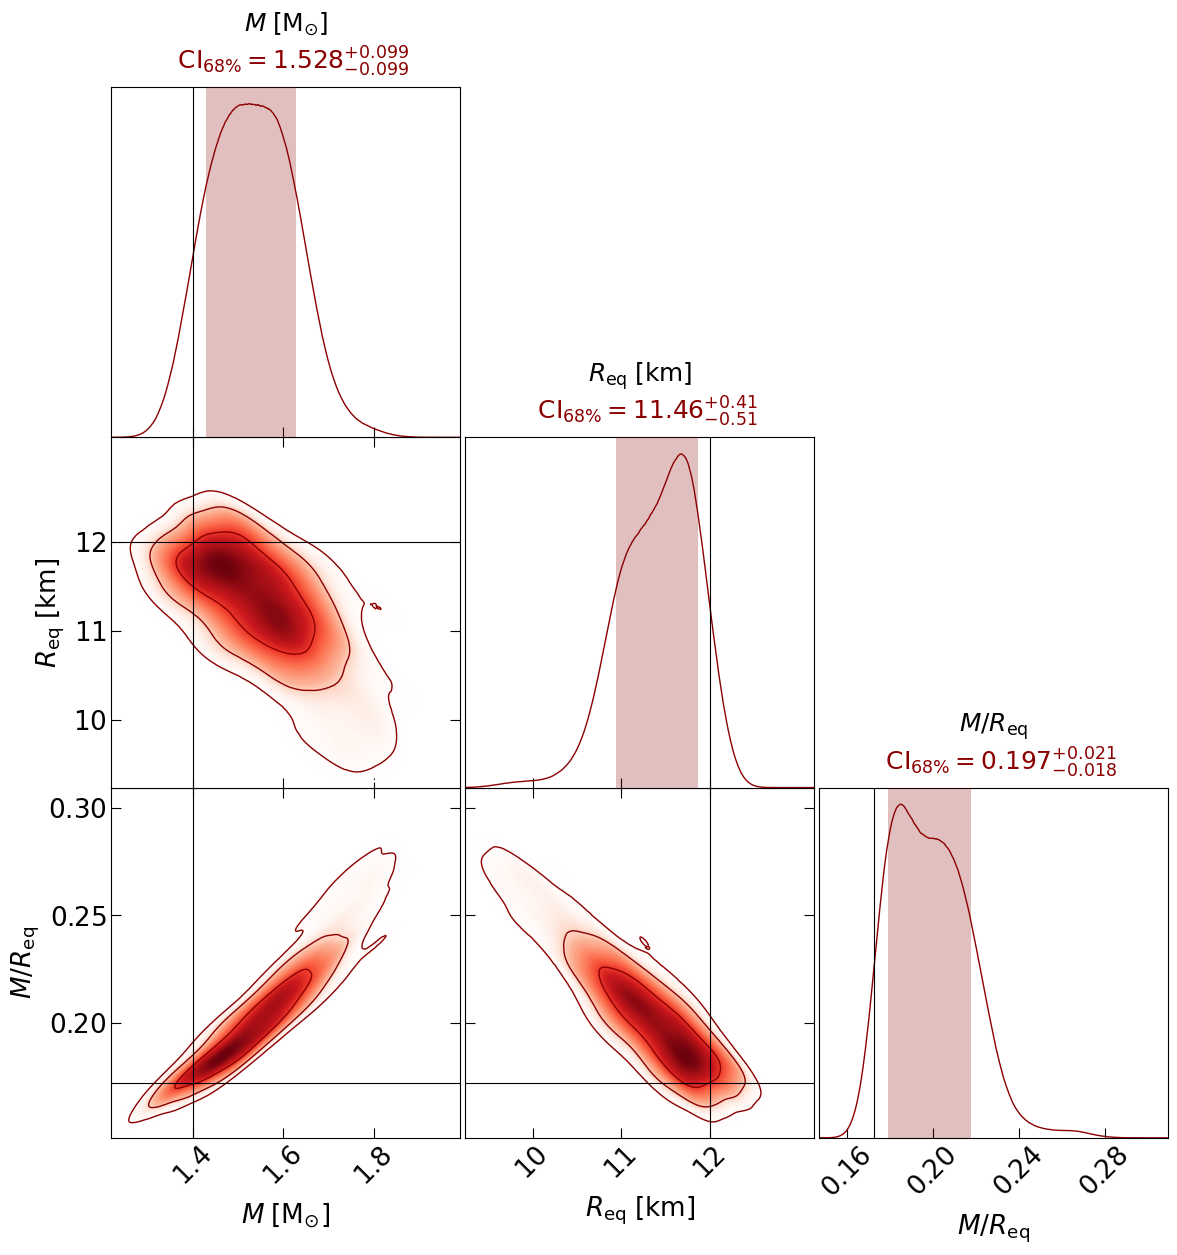

In [6]:
mass_radius = ["mass", "radius", "compactness"]
cornerplot(mass_radius)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['distance', 'column_density']
Veneering spines and axis ticks...
Veneered.
Adding parameter truth crosshairs...
Added crosshairs.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


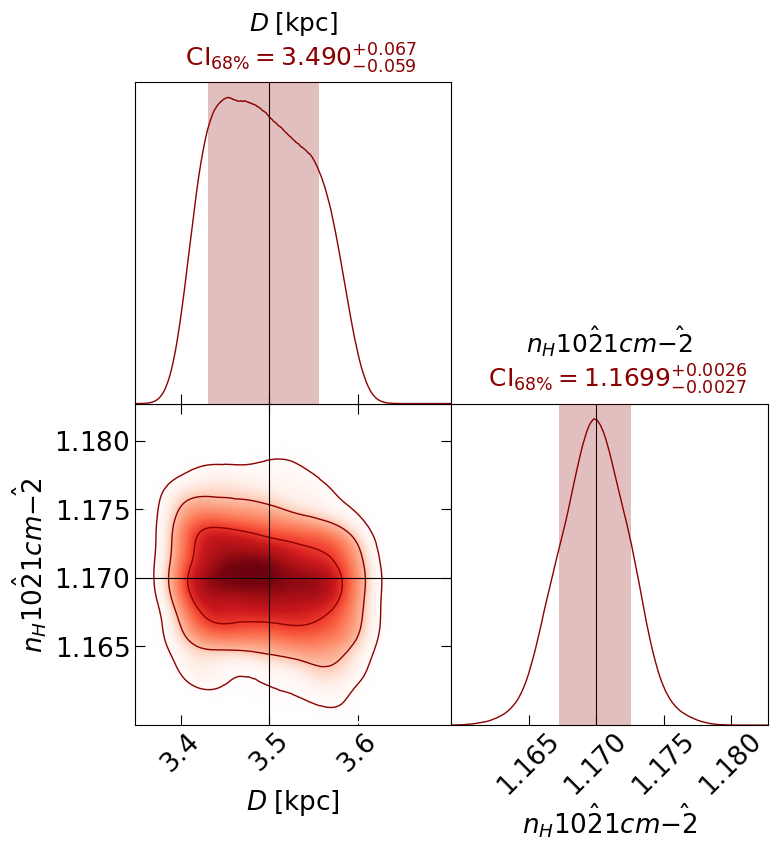

In [7]:
interstellar = ["distance", "column_density"]
cornerplot(interstellar)


Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['cos_inclination', 'p__phase_shift']
plotting:  ['cos_inclination', 'p__super_colatitude']
plotting:  ['cos_inclination', 'p__super_radius']
plotting:  ['p__phase_shift', 'p__super_colatitude']
plotting:  ['p__phase_shift', 'p__super_radius']
plotting:  ['p__super_colatitude', 'p__super_radius']
Veneering spines and axis ticks...
Veneered.
Adding parameter truth crosshairs...
Added crosshairs.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


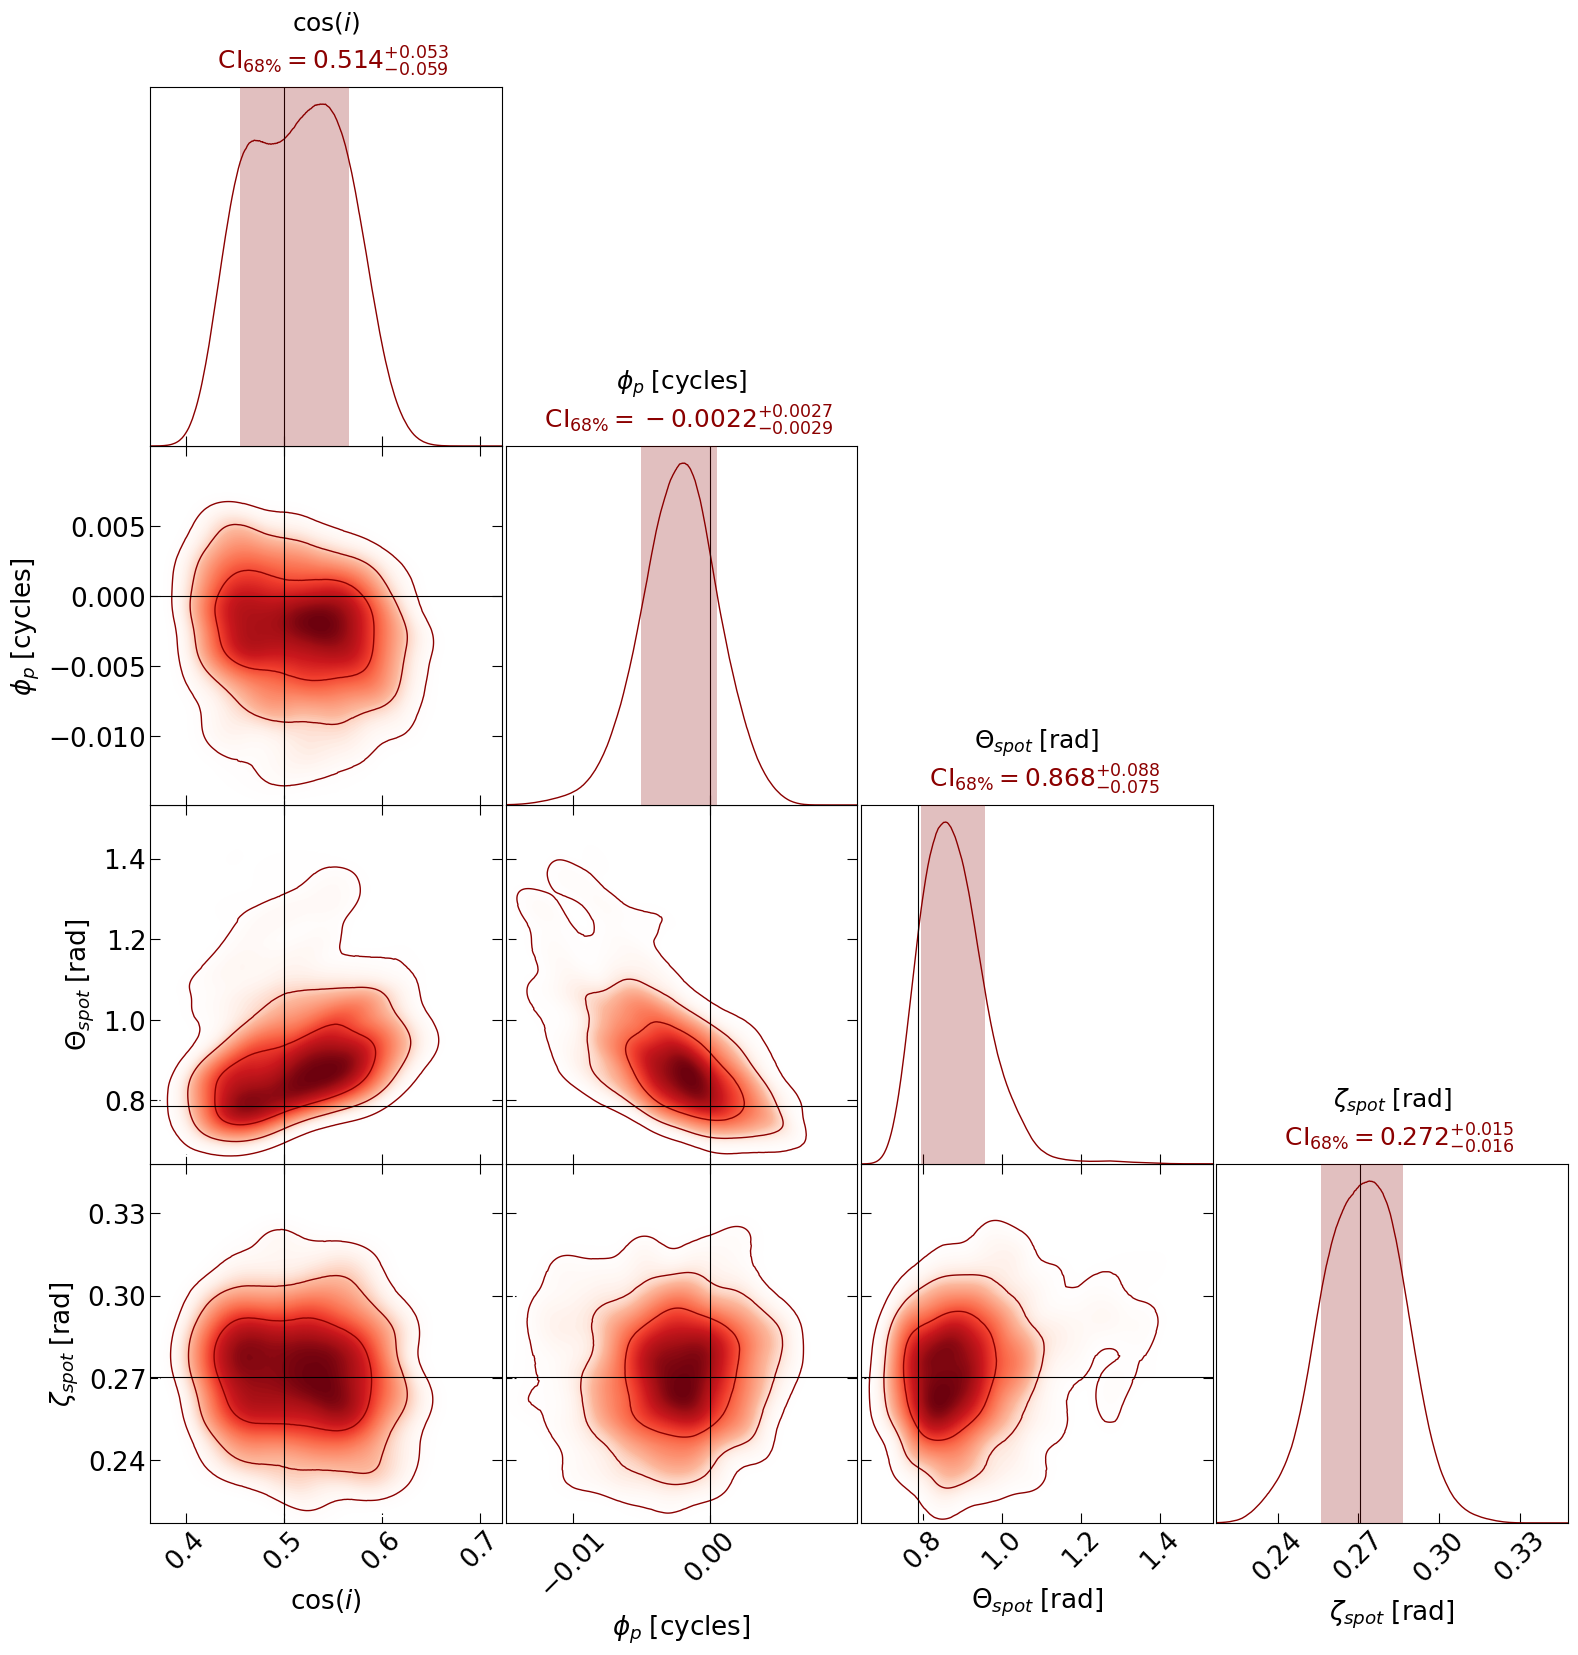

In [8]:
geometry = ['cos_inclination', 'p__phase_shift', 'p__super_colatitude', 'p__super_radius']

cornerplot(geometry)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['tbb_keV', 'te_keV']
plotting:  ['tbb_keV', 'p__super_tau']
plotting:  ['te_keV', 'p__super_tau']
Veneering spines and axis ticks...
Veneered.
Adding parameter truth crosshairs...
Added crosshairs.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


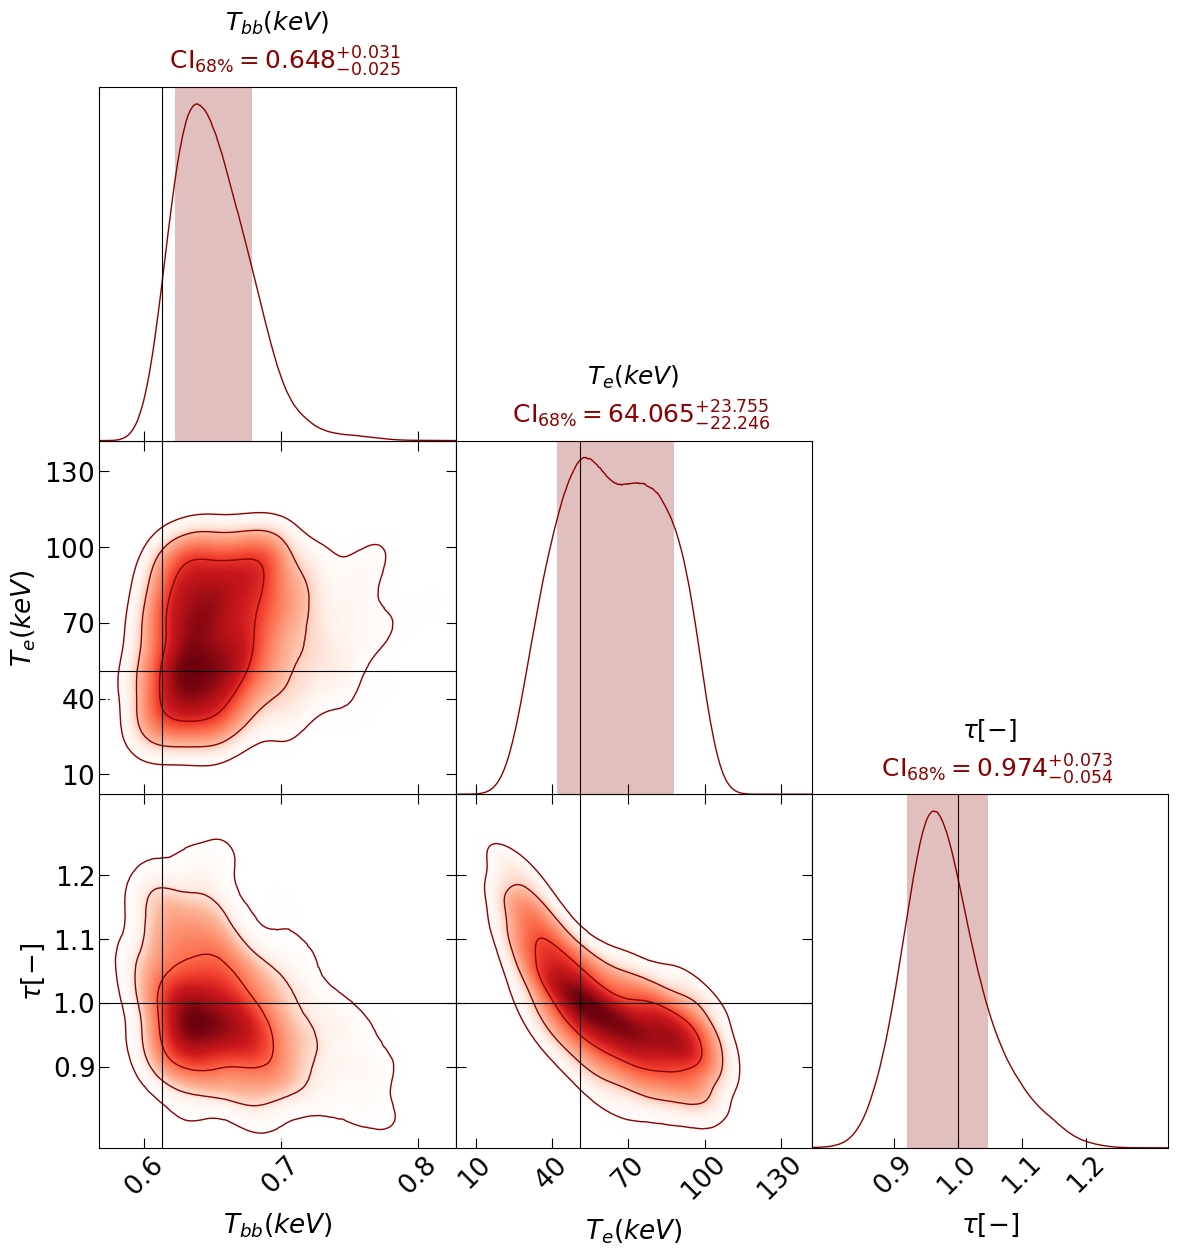

In [9]:
atmosphere = ['tbb_keV', 'te_keV', 'p__super_tau']
cornerplot(atmosphere)

Executing posterior density estimation...
Curating set of runs for posterior plotting...
Run set curated.
Constructing lower-triangle posterior density plot via Gaussian KDE:
plotting:  ['T_else_keV', 'T_in_keV']
plotting:  ['T_else_keV', 'R_in']
plotting:  ['T_in_keV', 'R_in']
Veneering spines and axis ticks...
Veneered.
Adding parameter truth crosshairs...
Added crosshairs.
Adding 1D marginal credible intervals...
Plotting credible regions for posterior ST...
Added 1D marginal credible intervals.
Constructed lower-triangle posterior density plot.
Posterior density estimation complete.


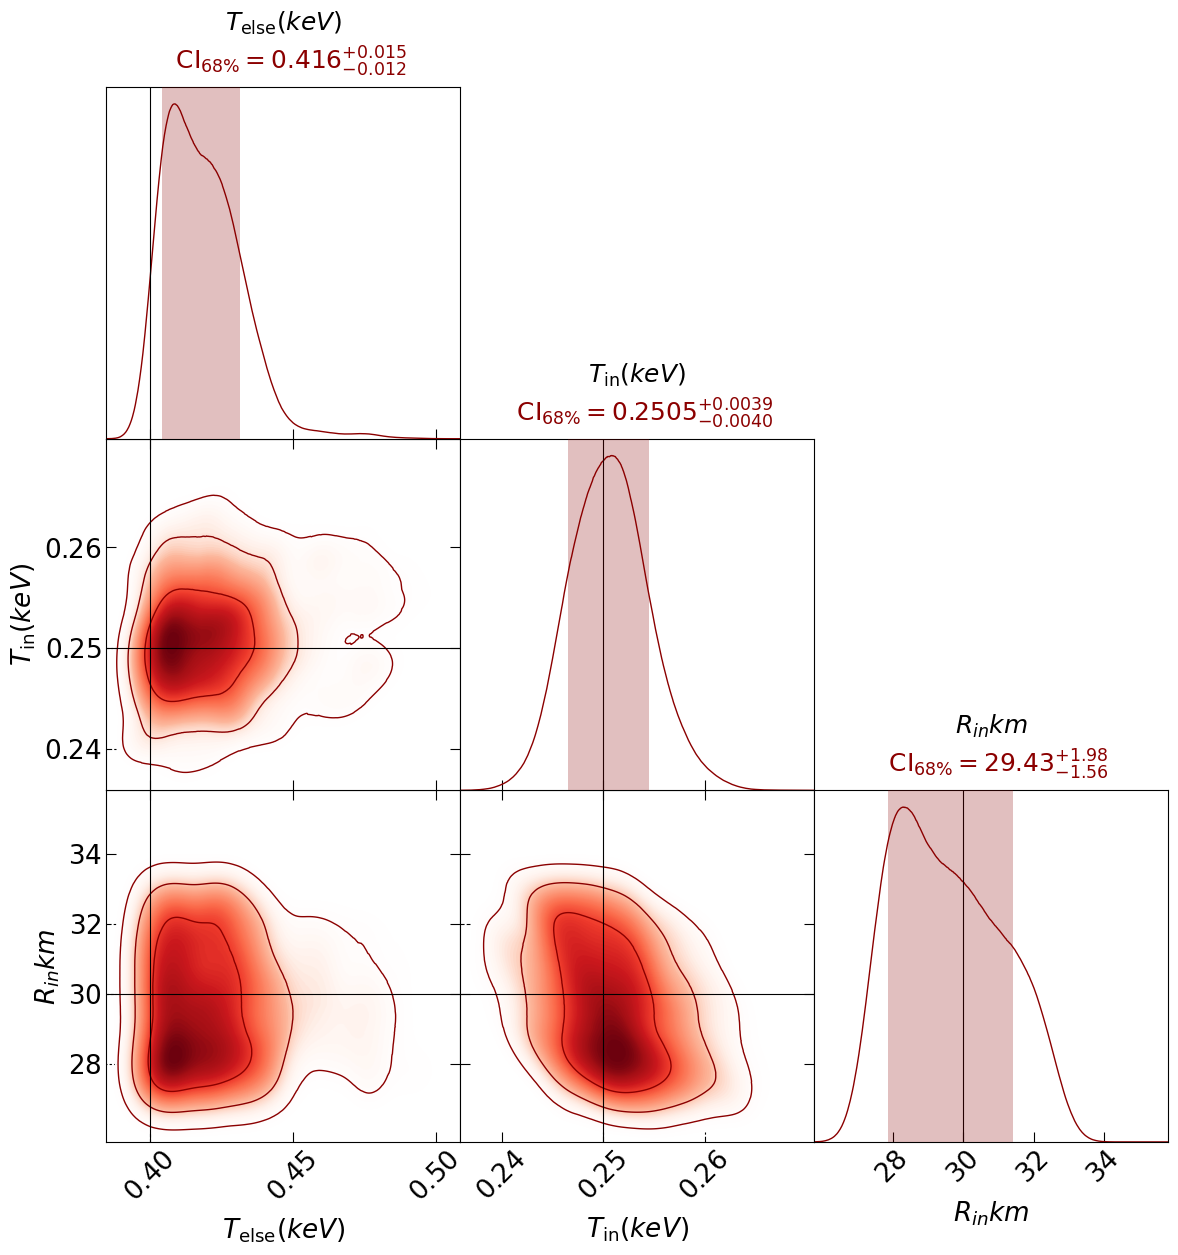

In [10]:
if bkg == 'model':
    background = ['T_else_keV', 'T_in_keV', 'R_in']
if bkg =='marginalise' or bkg =='fix':
    background = ['T_else_keV']

cornerplot(background)

Instantiating a residual plotter for posterior checking...
Declaring plot class settings...
Settings declared.
Residual plotter instantiated.
Plotting signals for posterior checking...
Curating set of runs for posterior plotting...
Run set curated.
Handling posterior ST...
Checking whether an existing cache can be read:
Creating new cache file...
Attempting to archive existing cache file in a subdirectory...
Targeting subdirectory: ./archive.
Exisiting cache file archived in subdirectory ./archive.
Initialising cache file...
Cache file initialised.
Cache file created.
Cache state determined.


Signal caching loop:   0%|          | 0/3 [00:00<?, ?it/s]

ResidualPlot object iterating over samples...
ResidualPlot object finished iterating.
ResidualPlot object finalizing...
ResidualPlot object finalized.
Writing plot to disk...
ResidualPlot instance plot will be written to path ./ST.bkg_tight__signalplot_residuals.pdf...
Written.
Handled posterior ST.
Plotted signals for posterior checking.


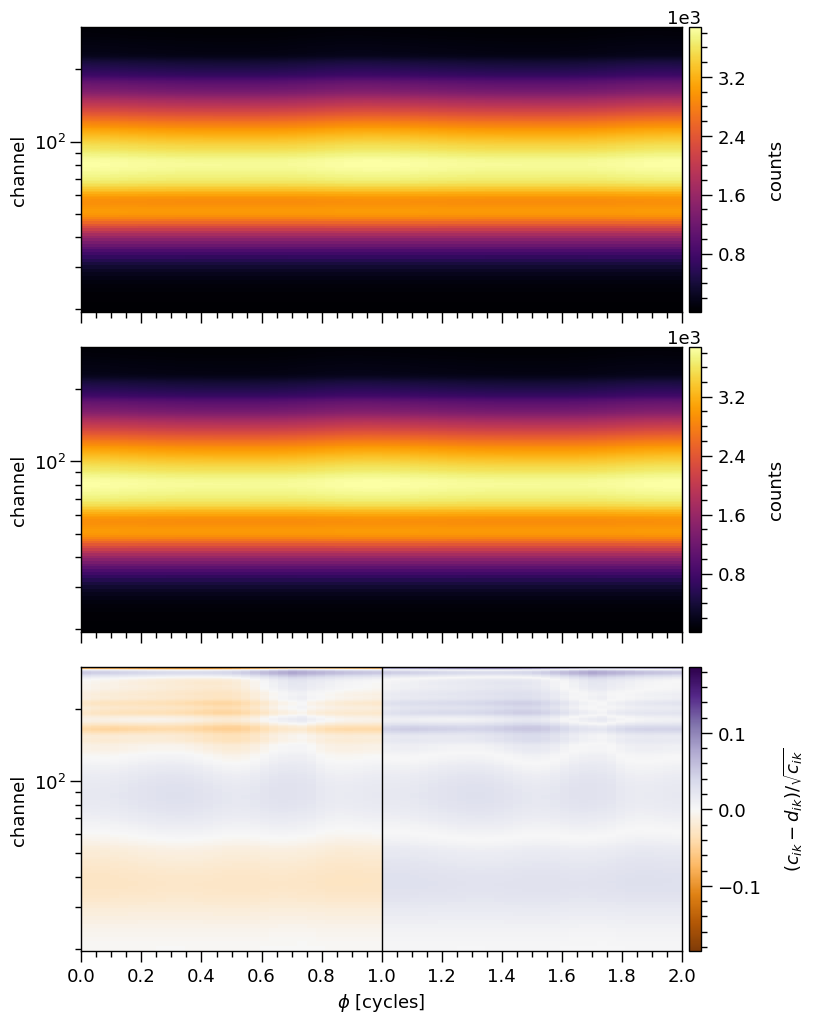

In [11]:
pp = xpsi.SignalPlotter([ST.runs])
pp.plot(IDs=OrderedDict([('ST', run_ids),
                        ]),
        combine=False, # use these controls if more than one run for a posterior
        combine_all=False,
        force_combine=False,
        only_combined=False,
        force_cache=True,
        nsamples=3,
        plots = {'ST': xpsi.ResidualPlot()})

pp.plots["ST"].fig


#%%

# plt.savefig(f'./corner_run_se={sampling_efficiency}_lp={live_points}_atm={atmosphere_type}{n_params}_ne={num_energies}_mi={max_iterations}.png')



pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
fig = pp.plot(
     params=["mass", "radius", "compactness"],
     IDs=OrderedDict([('ST', job_labels),]),
     prior_density=False,
     KL_divergence=True,
     ndraws=5e4,
     combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
     param_plot_lims={},
     bootstrap_estimators=False,
     bootstrap_density=False,
     n_simulate=200,
     crosshairs=True,
     write=True,
     ext='.png',
     maxdots=3000,
     root_filename=f'run',
     credible_interval_1d=True,
     credible_interval_1d_all_show=True, # To show credible intervals for all runs/models
     show_vband=[0,1],                   # To list which vertical colored bands are shown in 1D-posteriors
                                         #  0 for run_seed0,  1 for run_seed42
     annotate_credible_interval=True,
     compute_all_intervals=False,
     sixtyeight=True,
     axis_tick_x_rotation=45.0,
     num_plot_contours=3,
     subplot_size=4.0,
     legend_corner_coords=(0.675,0.8),
     legend_frameon=False,
     scale_attrs=OrderedDict([('legend_fontsize', 2.0),
                              ('axes_labelsize', 1.35),
                              ('axes_fontsize', 'axes_labelsize'),
                             ]
                            ),
     colormap='Reds',
     shaded=True,
     shade_root_index=-1,
     rasterized_shade=True,
     no_ylabel=True,
     no_ytick=True,
     lw=1.0,
     lw_1d=1.0,
     filled=False,
     normalize=True,
     veneer=True,
     #contour_colors=['orange'],
     tqdm_kwargs={'disable': False},
     lengthen=2.0,
     embolden=1.0,
     nx=500)



In [12]:
# pp = xpsi.PostProcessing.CornerPlotter([ST.runs])
# fig = pp.plot(
#      params=ST.names,
#      IDs=OrderedDict([('ST', run_ids),]),
#      prior_density=False,
#      KL_divergence=True,
#      ndraws=5e4,
#      combine=False, combine_all=True, only_combined=False, overwrite_combined=True,
#      param_plot_lims={},
#      bootstrap_estimators=False,
#      bootstrap_density=False,
#      n_simulate=200,
#      crosshairs=True,
#      write=True,
#      ext='.png',
#      maxdots=3000,
#      root_filename=f'run',
#      credible_interval_1d=True,
#      credible_interval_1d_all_show=True, # To show credible intervals for all runs/models
#      show_vband=[0,1],                   # To list which vertical colored bands are shown in 1D-posteriors
#                                          #  0 for run_seed0,  1 for run_seed42
#      annotate_credible_interval=True,
#      compute_all_intervals=False,
#      sixtyeight=True,
#      axis_tick_x_rotation=45.0,
#      num_plot_contours=3,
#      subplot_size=4.0,
#      legend_corner_coords=(0.675,0.8),
#      legend_frameon=False,
#      scale_attrs=OrderedDict([('legend_fontsize', 2.0),
#                               ('axes_labelsize', 1.35),
#                               ('axes_fontsize', 'axes_labelsize'),
#                              ]
#                             ),
#      colormap='Reds',
#      shaded=True,
#      shade_root_index=-1,
#      rasterized_shade=True,
#      no_ylabel=True,
#      no_ytick=True,
#      lw=1.0,
#      lw_1d=1.0,
#      filled=False,
#      normalize=True,
#      veneer=True,
#      #contour_colors=['orange'],
#      tqdm_kwargs={'disable': False},
#      lengthen=2.0,
#      embolden=1.0,
#      nx=500)

![Kajava spectra](kajavaspectra.png)

In [13]:
# # checking if the backgrounds are close to the true background, as I had intended to do with the sf=1e-3 run
# p_maxl = [0.159453062566177328E+01, 
#           0.104589643155779335E+02, 
#           0.355799081205166212E+01, 
#           0.330597355227586487E+00, 
#           0.207947642719953973E+00,
#           0.171332491837719258E+00,
#           0.175973934142429345E+00,
#           0.186454798788438306E-02,
#           0.197617176695489405E+03,
#           0.872444286178499784E+00,
#           0.679089797332088629E+01,
#           0.112671121569684662E+01]

# ST.likelihood(p_maxl, reinitialise=True)
# plt.plot(ST.signal.background_signal)
# bg_spectrum = np.loadtxt(ST.file_bkg)
# plt.plot(bg_spectrum*ST.data.exposure_time)